# Spotify songs popularity prediction
Using other features of the songs predict what might be the popularity of the song.

In [1]:
import os
import torch

In [2]:
# importing needed EDA libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/data.csv")

In [4]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [5]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [7]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

## Data Information
According to the information given on Kaggle the data has following attributes:
The "data.csv" file contains more than 160,000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

### Primary:
    - id (Id of track generated by Spotify)
### Numerical:
    - acousticness (Ranges from 0 to 1)
    - danceability (Ranges from 0 to 1)
    - energy (Ranges from 0 to 1)
    - duration_ms (Integer typically ranging from 200k to 300k)
    - instrumentalness (Ranges from 0 to 1)
    - valence (Ranges from 0 to 1)
    - popularity (Ranges from 0 to 100)
    - tempo (Float typically ranging from 50 to 150)
    - liveness (Ranges from 0 to 1)
    - loudness (Float typically ranging from -60 to 0)
    - speechiness (Ranges from 0 to 1)
    - year (Ranges from 1921 to 2020)
### Dummy:
    - mode (0 = Minor, 1 = Major)
    - explicit (0 = No explicit content, 1 = Explicit content)
### Categorical:
    - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
    - artists (List of artists mentioned)
    - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - name (Name of the song)


<AxesSubplot:xlabel='year', ylabel='loudness'>

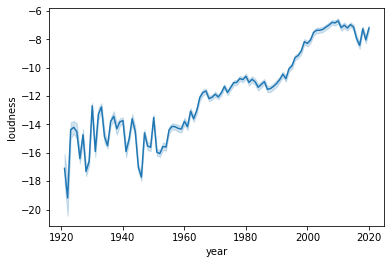

In [8]:
sns.lineplot(data=df, x=df['year'], y=df.loudness)

<AxesSubplot:xlabel='year', ylabel='speechiness'>

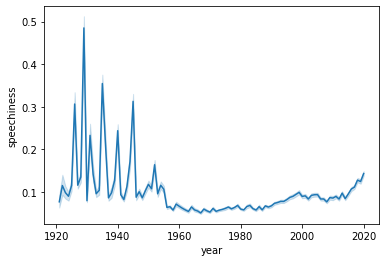

In [9]:
sns.lineplot(data=df, x=df['year'], y=df.speechiness)

<AxesSubplot:xlabel='year', ylabel='duration_ms'>

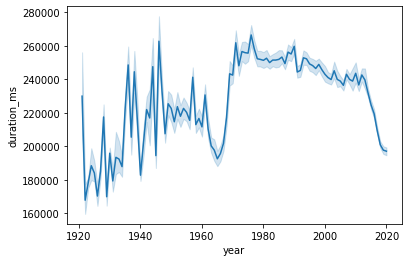

In [10]:
sns.lineplot(data=df, x=df['year'], y=df.duration_ms)

In [11]:
dataset_1 = df[["year","loudness", "speechiness"]]
dataset_1.head()

,year,loudness,speechiness
0,1928,-12.428,0.0506
1,1928,-28.454,0.0462
2,1928,-19.924,0.9290
3,1928,-14.734,0.0926
4,1928,-16.829,0.0424


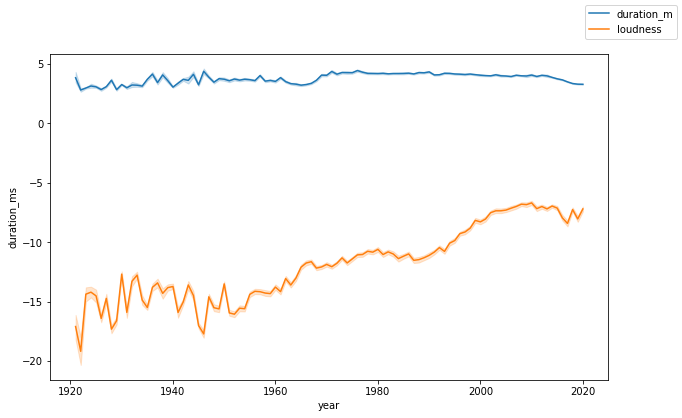

In [12]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=dataset_1,x=dataset_1.year,y=df.duration_ms/60000,legend=True,)
sns.lineplot(data=dataset_1,x=dataset_1.year,y=dataset_1.loudness,legend=True)
fig.legend(labels=['duration_m','loudness'])

In [13]:
np.mean(df.duration_ms/60000),  np.median(df.duration_ms/60000), np.std(df.duration_ms/60000)

(3.856769316222256, 3.4766666666666666, 2.0220261033096483)

##### Comparing:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- liveness (Ranges from 0 to 1)
- speechiness (Ranges from 0 to 1)
###### trend over the years

In [14]:
dataset_2 = df.drop(columns=["tempo", 'duration_ms', 'loudness','id','key','name', 'release_date', 'artists'])
dataset_2['popularity']= dataset_2.popularity/100
dataset_2.tail()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,mode,popularity,speechiness,valence,year
169904,0.1730,0.875,0.443,1,0.000032,0.0891,1,0.75,0.1430,0.306,2020
169905,0.0167,0.719,0.385,0,0.031300,0.1110,1,0.64,0.0403,0.270,2020
169906,0.5380,0.514,0.539,0,0.002330,0.1080,1,0.70,0.1050,0.153,2020
169907,0.0714,0.646,0.761,0,0.000000,0.2220,1,0.70,0.0385,0.472,2020
169908,0.1090,0.512,0.428,0,0.000000,0.1050,1,0.65,0.0271,0.366,2020


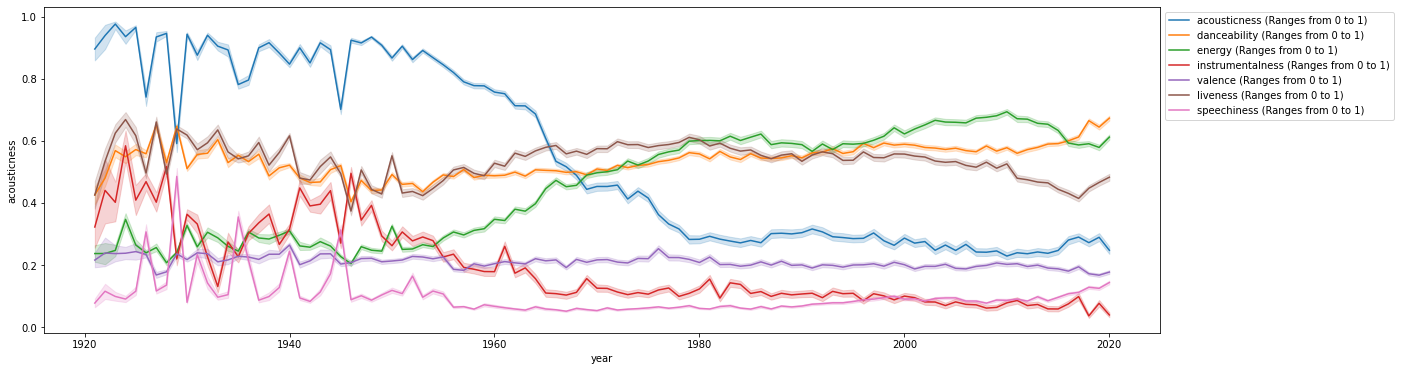

In [20]:
fig1 = plt.figure(figsize=(20,6))
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.acousticness,legend=True,)
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.danceability,legend=True)
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.energy,legend=True)
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.instrumentalness,legend=True)
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.liveness,legend=True)
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.valence,legend=True)
sns.lineplot(data=dataset_2,x=dataset_2.year,y=dataset_2.speechiness,legend=True)
plt.legend(labels=['acousticness (Ranges from 0 to 1)','danceability (Ranges from 0 to 1)','energy (Ranges from 0 to 1)','instrumentalness (Ranges from 0 to 1)','valence (Ranges from 0 to 1)','liveness (Ranges from 0 to 1)','speechiness (Ranges from 0 to 1)'],loc = 2, bbox_to_anchor = (1,1))

In [21]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000
